In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [247]:
data=pd.read_csv('predictive_maintenance.csv')

In [248]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [249]:
target=(data['Target']==0).sum()
target

9661

In [250]:
target1=(data['Target']==1).sum()
target1

339

In [251]:
y=pd.DataFrame(data['Target'].values==1)

In [252]:
y

,0
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,False
9997,False
9998,False


In [253]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [255]:
data.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [256]:
data.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [257]:
df=pd.DataFrame(data.drop(['Product ID','Type','Failure Type'], axis=1))

In [258]:
df.head()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,1,298.1,308.6,1551,42.8,0,0
1,2,298.2,308.7,1408,46.3,3,0
2,3,298.1,308.5,1498,49.4,5,0
3,4,298.2,308.6,1433,39.5,7,0
4,5,298.2,308.7,1408,40.0,9,0


In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 547.0 KB


c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


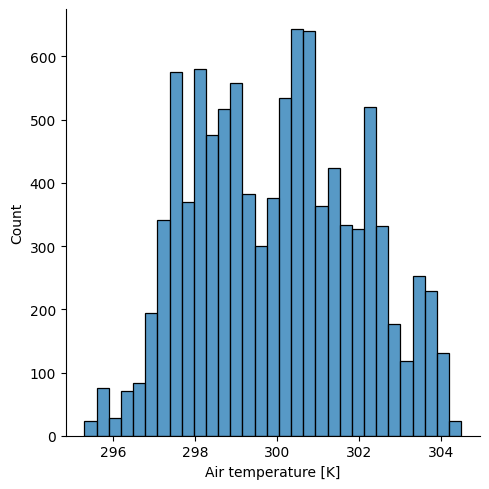

In [260]:
sns.displot(df['Air temperature [K]'],kde=False)

<Axes: >

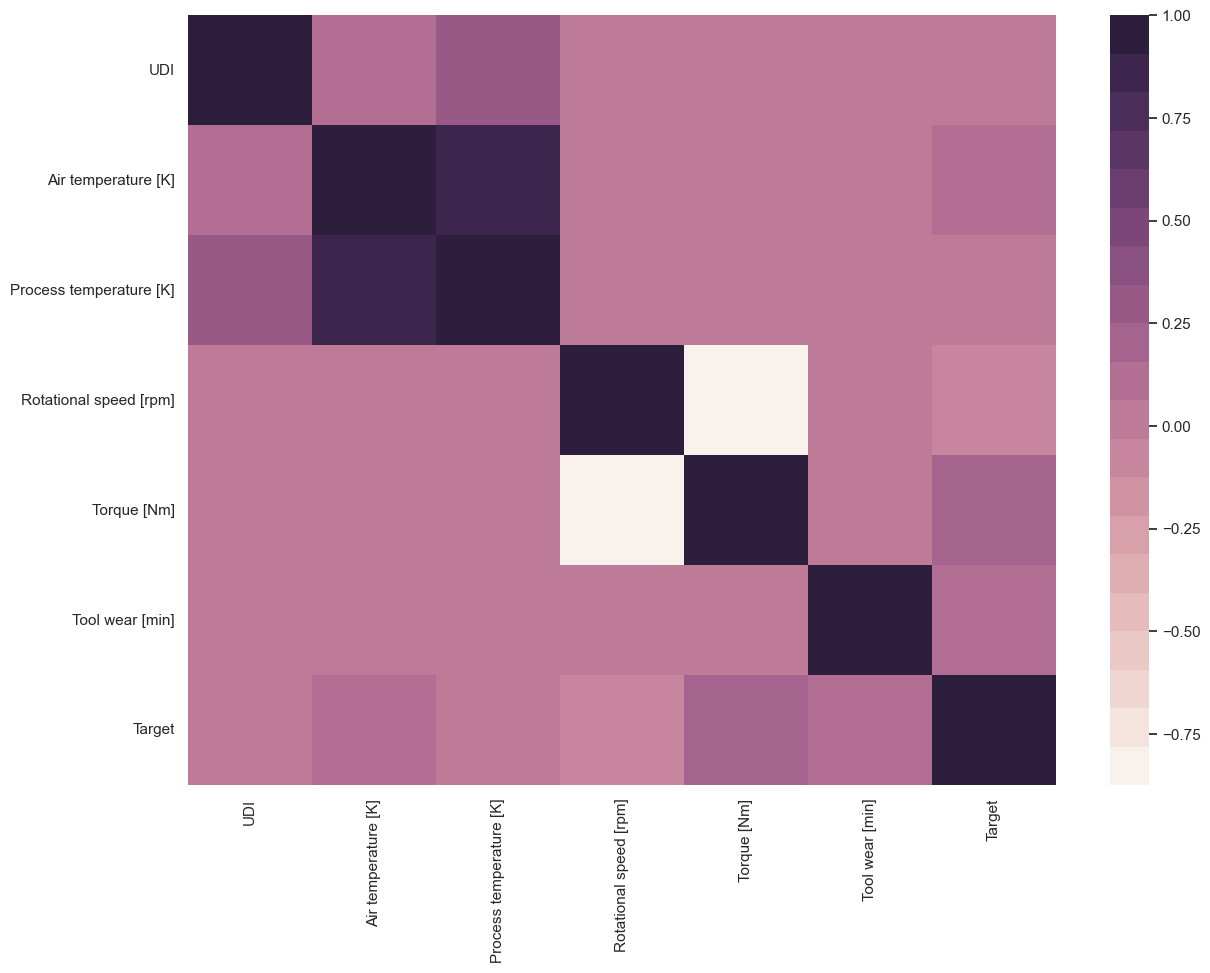

In [283]:
import seaborn as sns
 
sns.set(rc={'figure.figsize': (14, 10)})
 
ind_var = [df.columns]
 
sns.heatmap(data.select_dtypes(include='number').corr(),
            cmap=sns.cubehelix_palette(20, light=0.95, dark=0.15))

In [261]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [262]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values


In [263]:
from sklearn.model_selection import train_test_split

In [264]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [265]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
cf=DecisionTreeClassifier()


In [266]:
cf.fit(X_train,y_train)

DecisionTreeClassifier()

In [267]:
prediction=cf.predict(X_test)

In [270]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [271]:
cm,acc_=confusion_matrix(y_test,prediction),accuracy_score(y_test,prediction)

In [272]:
print(cm,acc_)

[[3164   35]
 [  41   60]] 0.9769696969696969


In [320]:

X_test

array([[6253. ,  300.8,  310.3, 1538. ,   36.1,  198. ],
       [4685. ,  303.6,  311.8, 1421. ,   44.8,  101. ],
       [1732. ,  298.3,  307.9, 1485. ,   42. ,  117. ],
       ...,
       [6095. ,  300.9,  310.8, 1402. ,   48.1,   22. ],
       [8782. ,  297.6,  308.7, 1552. ,   42.3,   27. ],
       [9402. ,  297.7,  308.2, 1720. ,   25.6,  174. ]])

In [340]:
tets=([[11111110,25555555557.9,99999909.8,18955162166,755555551.6,31]])

In [342]:
predict=cf.predict(tets)
if predict==1:
    print("Fail")



Fail
